<a href="https://colab.research.google.com/github/AbhishekPatil1404/Car-Price-Predictio-using-decisionTreeRegressor/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps
1. Import the libraries
2. Import the datasets
3. Perform data analysis and EDA
4. Spliting the data
5. [Optional]Data preprocessing - feature scaling
6. Choosing the model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Problem statement

# Importing the dataset

In [ ]:
df=pd.read_csv("/content/car_data.csv")

# Data Analysis and EDA

In [ ]:
df.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.ndim

2

In [ ]:
df.shape

(301, 9)

In [ ]:
df.columns

Index(['Car Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
df.Seller_Type.unique()


array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df.Transmission.unique()


array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.Owner.unique()


array([0, 1, 3])

In [ ]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values:
# Petrol - 0
# Disel - 1
# CNG - 2
dfc = df.copy()

In [ ]:
x = dfc.Fuel_Type.replace({"Petrol": 0, "Diesel":1, "CNG":2})

In [ ]:
dfc.insert(df.columns.get_loc("Fuel_Type"), "new_fuel", x)

In [ ]:
dfc.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,new_fuel,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Diesel,Dealer,Manual,0


In [ ]:
# Create a column new_seller_type and place it at index of the Seller_Type column
# Replace the values:
# Dealer - 0
# Individual - 1
x = dfc.Seller_Type.replace({"Dealer": 0, "Individual":1})
dfc.insert(df.columns.get_loc("Seller_Type"), "new_seller_type", x)

In [ ]:
dfc.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,new_fuel,new_seller_type,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Diesel,Dealer,Manual,0


In [ ]:
dfc.new_fuel.unique()

array([0, 1, 2])

In [ ]:
df.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
new_df=dfc.copy()

In [ ]:
new_df.columns

Index(['Car Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'new_fuel', 'new_seller_type', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [ ]:
new_df = new_df[['Fuel_Type', 'Seller_Type']]

In [ ]:
new_df.head()

,Fuel_Type,Seller_Type
0,Petrol,Dealer
1,Diesel,Dealer
2,Petrol,Dealer
3,Petrol,Dealer
4,Diesel,Dealer


In [ ]:
# Performing Feature Engineering
from sklearn.preprocessing import LabelEncoder

In [ ]:
new_df['Fuel_Type'] = LabelEncoder().fit_transform(new_df['Fuel_Type'])

In [ ]:
new_df['Fuel_Type'].unique()

array([2, 1, 0])

In [ ]:
new_df.Fuel_Type.unique()

array([2, 1, 0])

In [ ]:
df

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Seller_Type'] = LabelEncoder().fit_transform(df['Seller_Type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])

In [ ]:
df.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
# Create a column no_of_years = current year - year
df['current_year'] = 2024

In [ ]:
df.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [ ]:
df['no_of_years'] = df['current_year'] - df['Year']

In [ ]:
df.head()

,Car Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,ritz,2014,3.35,5.59,27000,2,0,1,0,2024,10
1,sx4,2013,4.75,9.54,43000,1,0,1,0,2024,11
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2024,7
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,2024,13
4,swift,2014,4.60,6.87,42450,1,0,1,0,2024,10


In [ ]:
df.drop(['Car Name', 'current_year', 'Year'], axis=1, inplace=True)


In [ ]:
df.rename(columns={'Selling_Price': 'Current_Selling_Price'}, inplace=True)

In [ ]:
df.head()

,Current_Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,2,0,1,0,10
1,4.75,9.54,43000,1,0,1,0,11
2,7.25,9.85,6900,2,0,1,0,7
3,2.85,4.15,5200,2,0,1,0,13
4,4.60,6.87,42450,1,0,1,0,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Current_Selling_Price  301 non-null    float64
 1   Present_Price          301 non-null    float64
 2   Kms_Driven             301 non-null    int64  
 3   Fuel_Type              301 non-null    int64  
 4   Seller_Type            301 non-null    int64  
 5   Transmission           301 non-null    int64  
 6   Owner                  301 non-null    int64  
 7   no_of_years            301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [ ]:
df.corr()

,Current_Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
Current_Selling_Price,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
no_of_years,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


<Axes: >

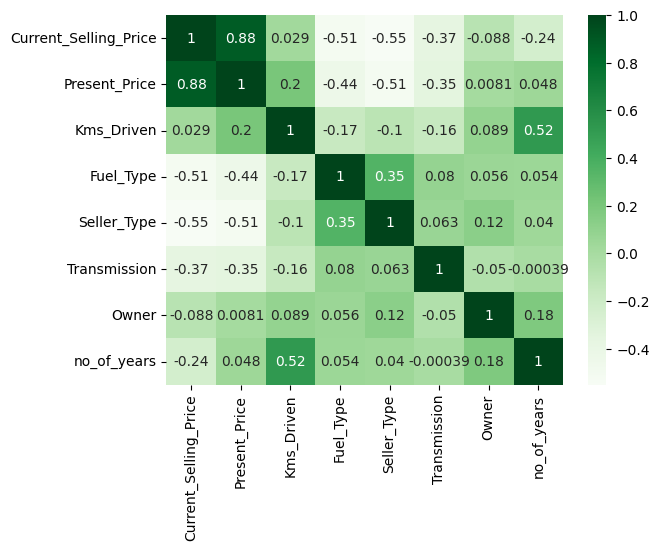

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='Greens')

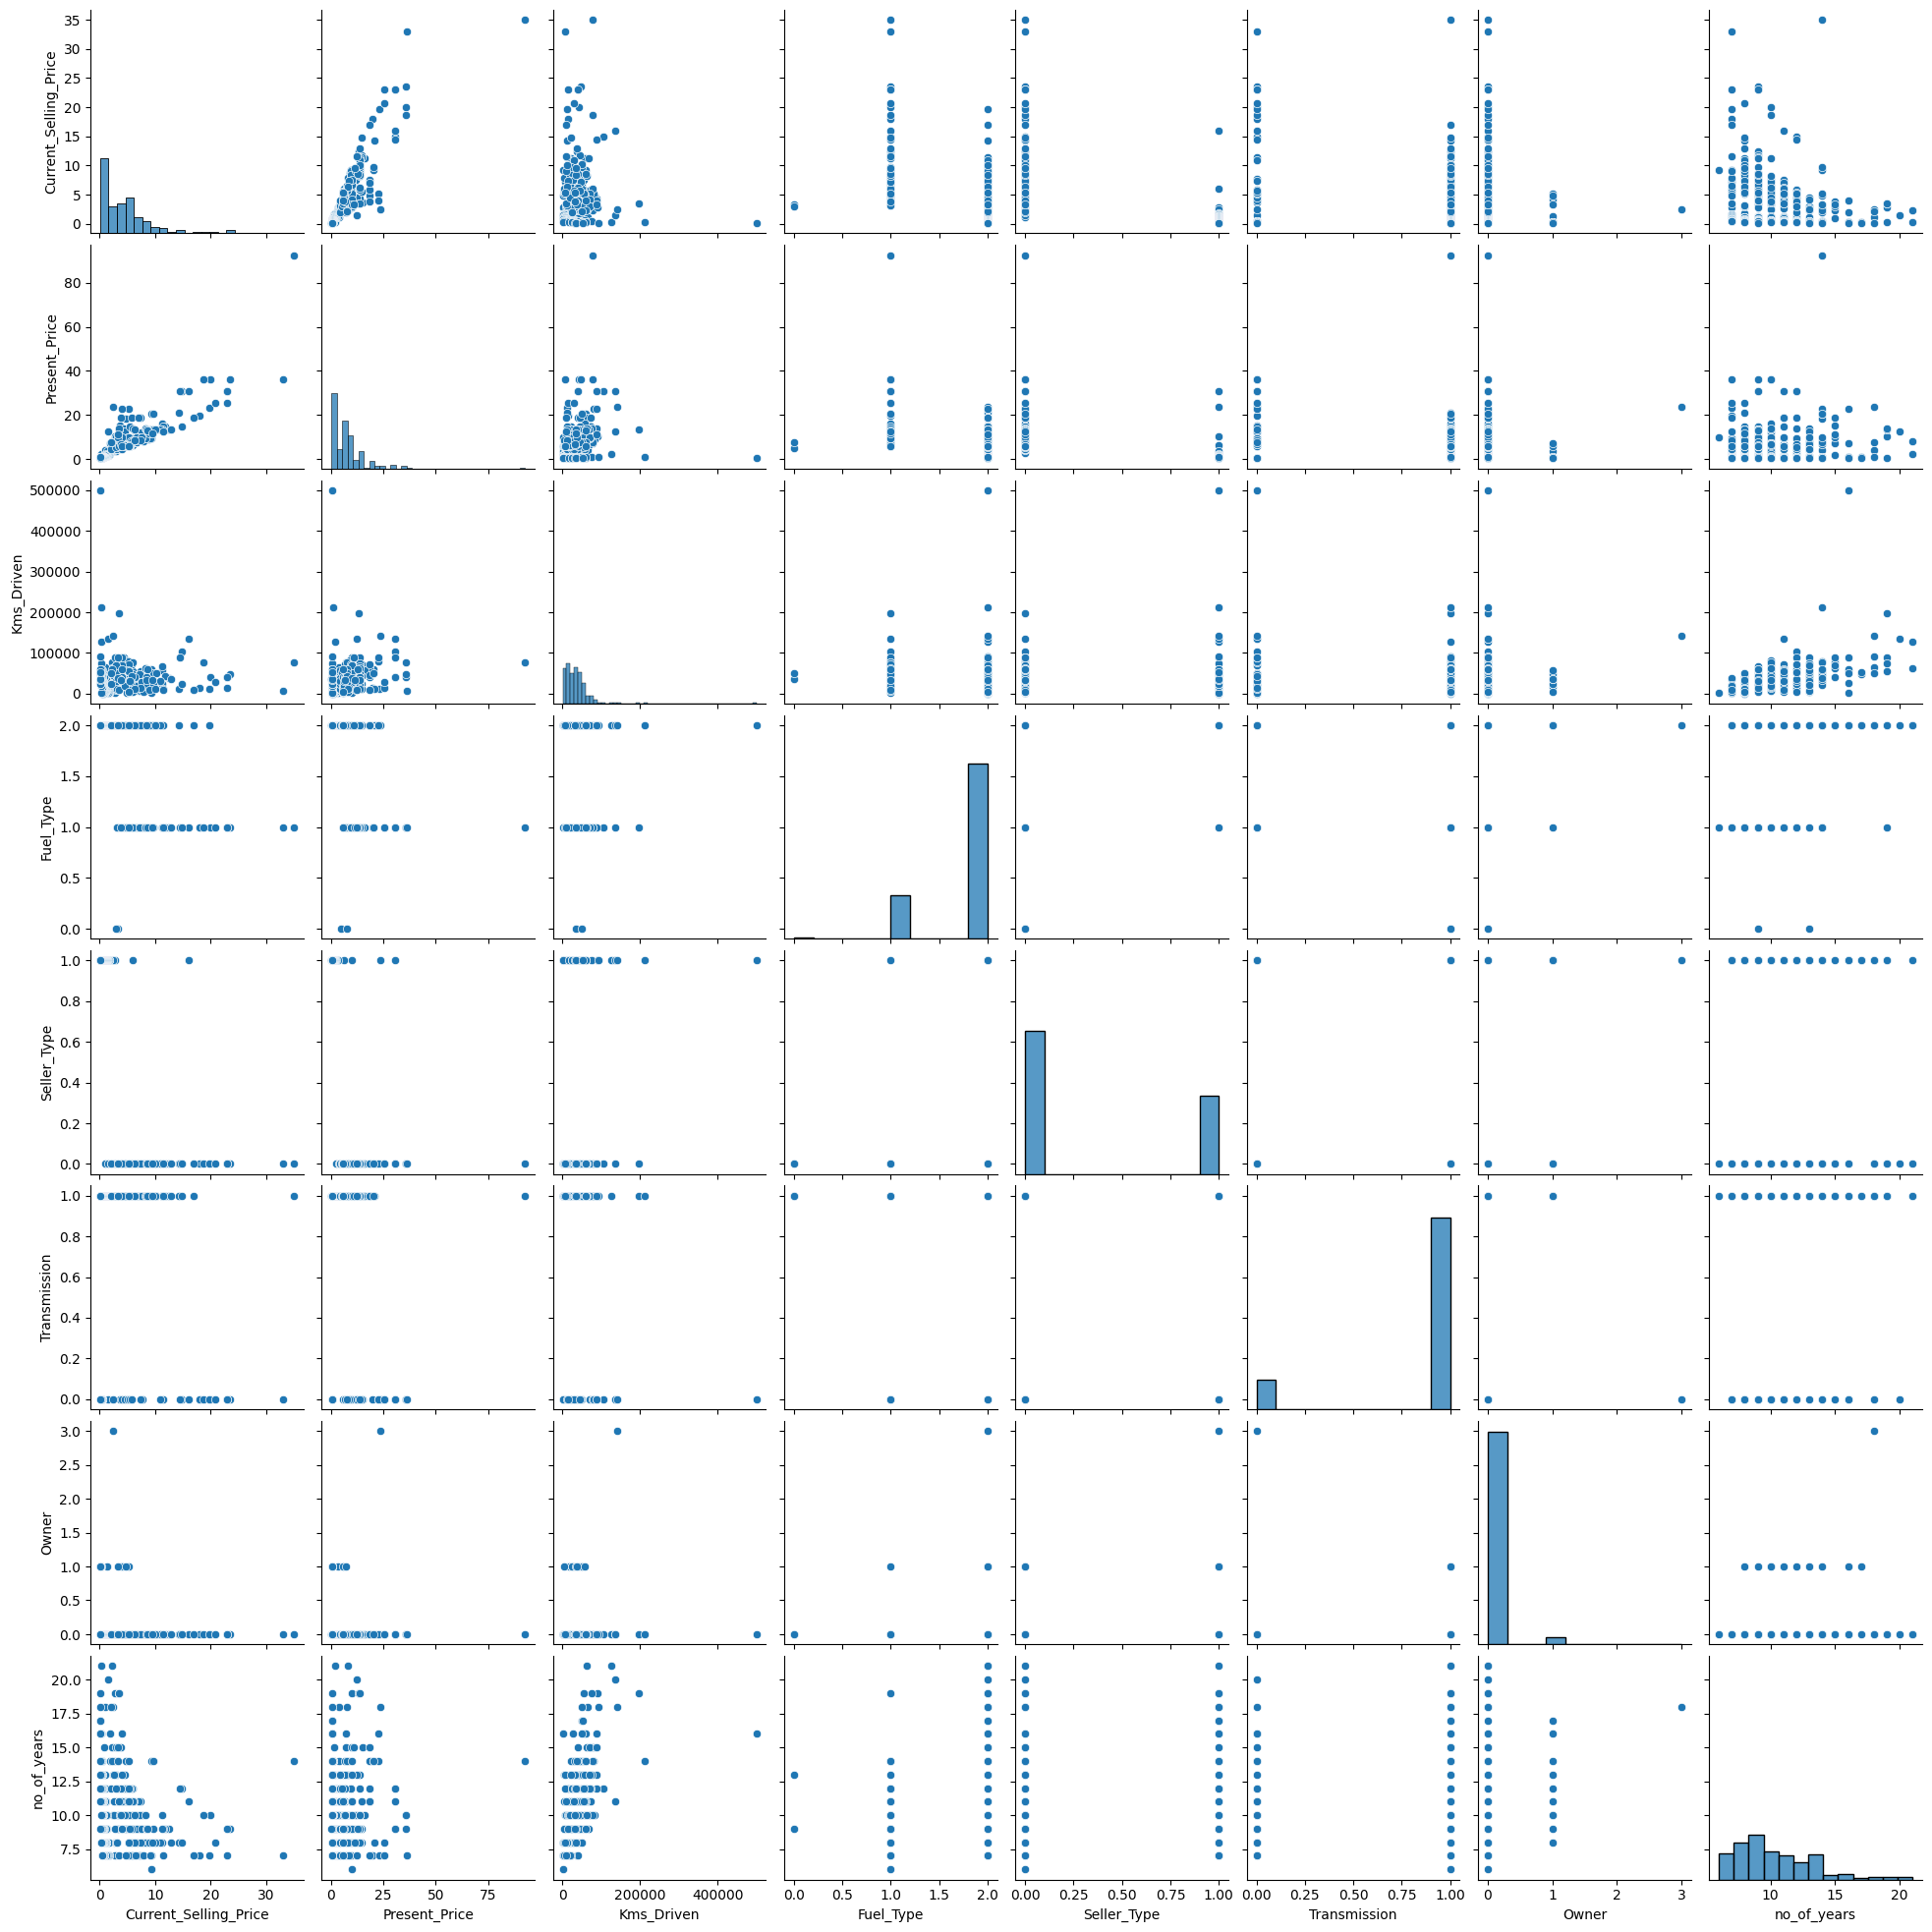

In [ ]:
sns.pairplot(df)

<Axes: >

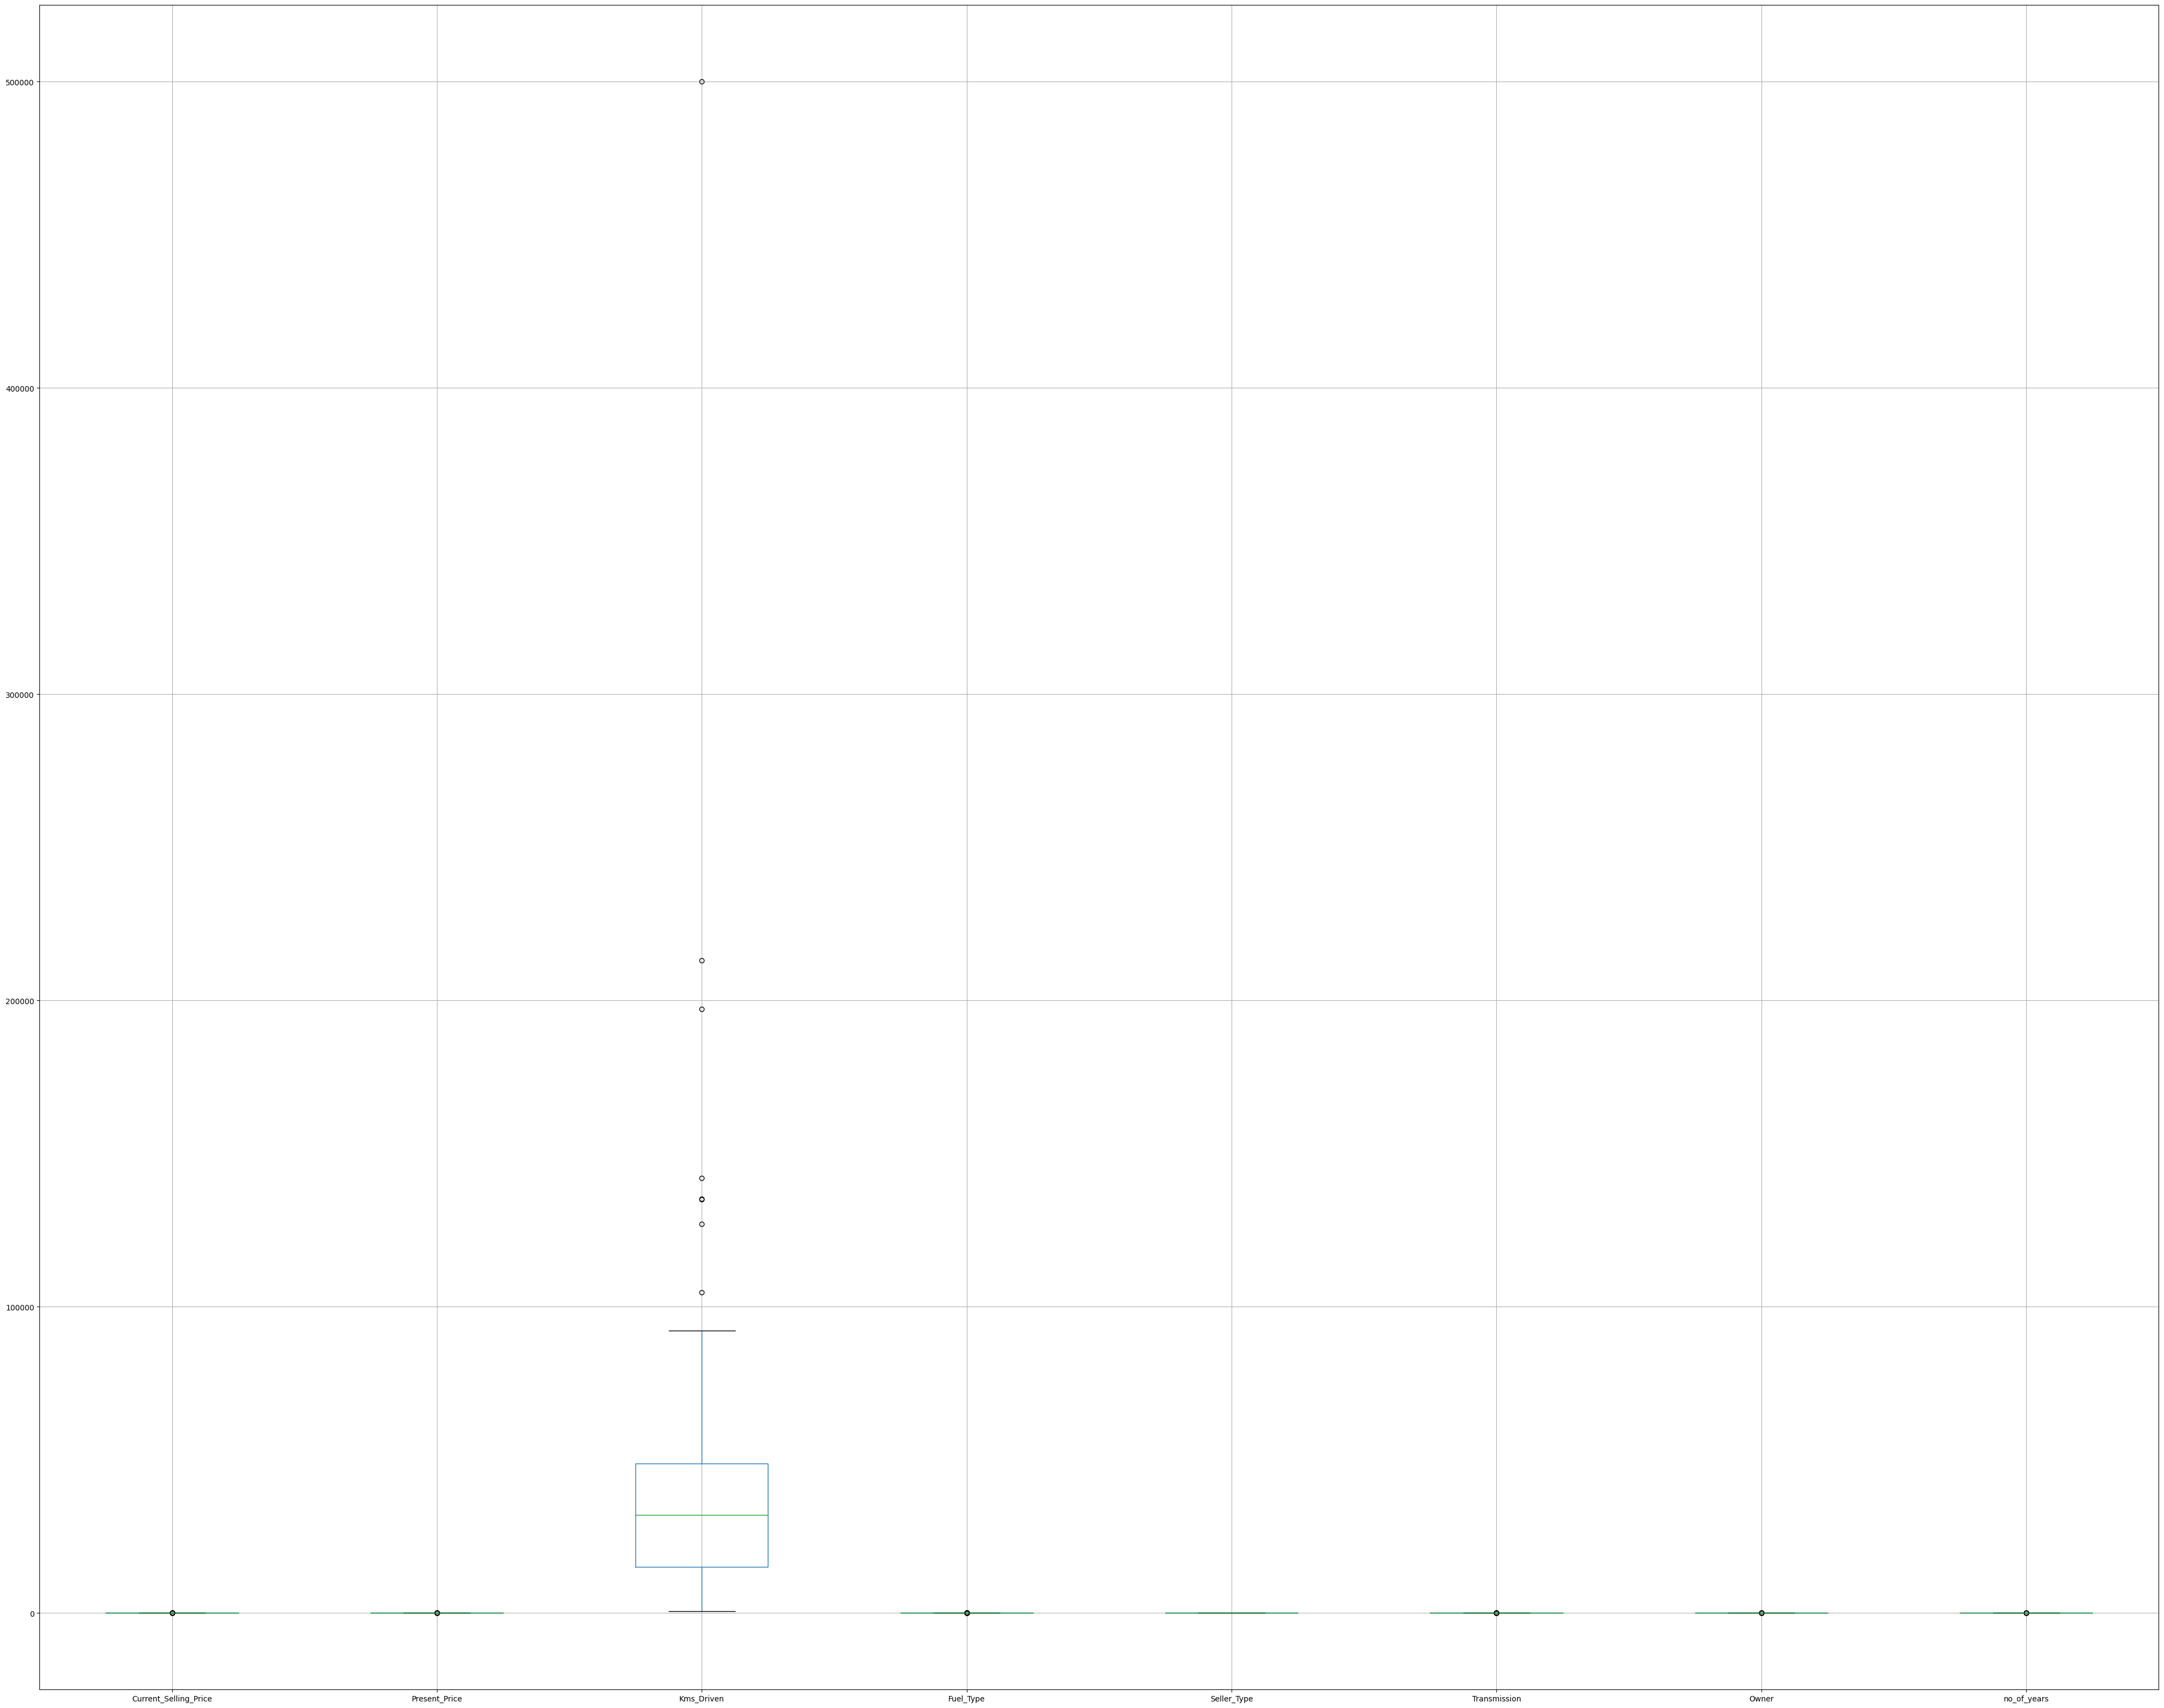

In [ ]:
plt.figure(figsize=(50,40))
df.boxplot()

# Select the features and targets

In [ ]:
x = np.array(df.drop('Current_Selling_Price', axis=1))
y = np.array(df.Current_Selling_Price)

# Spliting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(y_test)

61

# Choosing the model

In [ ]:
regressor = DecisionTreeRegressor()

# Training the model

In [ ]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

# Testing the model

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
target = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [ ]:
target

,Actual,Predicted
0,6.40,6.00
1,0.50,0.40
2,4.50,5.25
3,0.25,0.17
4,7.50,5.11
...,...,...
56,5.40,5.40
57,4.40,2.90
58,4.90,5.30
59,1.10,1.10


Text(0.5, 1.0, 'Actual V/s Predicted')

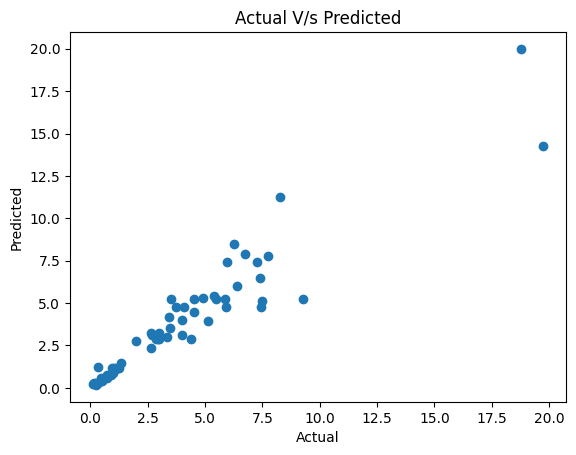

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual V/s Predicted')

<Axes: >

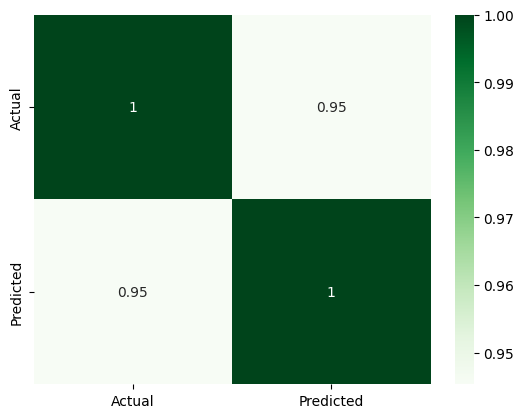

In [ ]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

# Performance

In [ ]:
r2_score(y_test, y_pred)

0.8931172053112109